In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### imports

In [149]:
print(__doc__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from sklearn.cluster import KMeans
from sklearn.utils.extmath import softmax
from sklearn.preprocessing import normalize
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

Automatically created module for IPython interactive environment


### utilities

In [168]:
def sigmoid(x):
    return 1 / (1 + (np.e**-x))

def infer_topic(doc_vector, topic_word_distr, threshold=None):
    doc_topic_word_distr = topic_word_distr.copy()
    
    if threshold is None:
        doc_word_freq_norm = doc_vector
        
    else:
        doc_word_freq_norm = (doc_vector > threshold).astype(int)
   
    for label_class in label_classes:
        doc_topic_word_distr[label_class] *= doc_word_freq_norm
    
    
    doc_topic = np.max(doc_topic_word_distr).idxmax()
    return doc_topic_word_distr, doc_topic

### load dataset

In [108]:
# total number of samples needed
datasize = 100

# retrieve dataset
docs = fetch_20newsgroups(subset='train', shuffle=False, remove=('headers', 'footers', 'quotes'))
docs, old_labels, classes = docs.data[:datasize], docs.target[:datasize], docs.target_names

### clean dataset

In [109]:
# clean out the new line characters from text in docs
def clean_doc(doc):
    ''' remove unwanter characters line new line '''

    unwanted_chrs = [')', '(', '{', '}', '\t', '\n', '\r', "'", '"', "!"]
    doc = doc.lower()
    for unwanted_chr in unwanted_chrs:
        doc = doc.replace(unwanted_chr, ' ')

    return doc.strip()

In [110]:
labels = []
clean_docs = []

# the new classes
label_classes = ['sci/comp', 'other']
# label_classes = list(set([x.split('.')[0] for x in classes]))

for index, doc in enumerate(docs):
    cd = clean_doc(doc)
    
    if cd and not cd.isspace():
        clean_docs.append(cd)
        
        cl = classes[old_labels[index]]
        if cl in ['sci', 'comp']:
            labels.append(0)
            
        else:
            labels.append(1)
        #labels.append(label_classes.index(classes[old_labels[index]].split('.')[0]))
    
print(clean_docs[0])

morgan and guzman will have era s 1 run higher than last year, and  the cubs will be idiots and not pitch harkey as much as hibbard.  castillo won t be good  i think he s a stud pitcher


In [111]:
print(f"there are {len(clean_docs)} docs and {len(label_classes)} classes: {label_classes}")

there are 96 docs and 2 classes: ['sci/comp', 'other']


### count words

In [112]:
# initialize the count vectorizer
count_vectorizer = CountVectorizer()
# count_vectorizer = TfidfVectorizer()

# fit it to dataset
train_docs, test_docs, train_labels, test_labels = train_test_split(clean_docs, labels, test_size=.33, random_state=42)
count_vectorizer.fit(train_docs)
vocabulary = count_vectorizer.get_feature_names()

print("word_count is", len(vocabulary))

word_count is 4973


### Prepare Datatset

In [113]:
# create doc count vectors
train_doc_vectors = count_vectorizer.transform(train_docs).toarray()
train_doc_vectors = normalize(train_doc_vectors, norm="l1", axis=1)
# train_doc_vectors = normalize(train_doc_vectors, norm="l1", axis=0)

test_doc_vectors = count_vectorizer.transform(test_docs).toarray()
test_doc_vectors = normalize(test_doc_vectors, norm="l1", axis=1)
# test_doc_vectors = normalize(test_doc_vectors, norm="l1", axis=0)

print(f"{len(train_labels)} train_docs, {len(test_labels)} test docs")

64 train_docs, 32 test docs


In [114]:
document_word_frequency = pd.DataFrame(train_doc_vectors, columns=count_vectorizer.get_feature_names())
document_word_binary_frequency = (document_word_frequency > 0).astype('int')

document_word_frequency["__labels__"] = train_labels
document_word_binary_frequency["__labels__"] = train_labels

print("document_word_frequency shape is", document_word_frequency.shape)

document_word_frequency shape is (64, 4974)


In [115]:
print(f"there are {len(clean_docs)} docs and {len(label_classes)} classes")

there are 96 docs and 2 classes


In [116]:
document_word_frequency.head()

,00,000,0188,02026,0837,0q,0qax,0qq,0t,0tbxn,...,z5,z6e1,z6e1t,z6ei,zealand,zeh,zip,zone,zoomed,__labels__
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018868,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1


In [117]:
document_word_binary_frequency.head()

,00,000,0188,02026,0837,0q,0qax,0qq,0t,0tbxn,...,z5,z6e1,z6e1t,z6ei,zealand,zeh,zip,zone,zoomed,__labels__
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Prepare Binary Dataset

In [118]:
#reduce freq in doc to bin value of 1 or 0
word_doc_binary_freqency = document_word_binary_frequency.drop(["__labels__"], axis='columns')
word_doc_freqency_prime = document_word_frequency.drop(["__labels__"], axis='columns')

#the sum vertically of bin freq
word_doc_total_frequency = word_doc_freqency_prime.sum(0)
word_doc_total_binary_frequency = word_doc_binary_freqency.sum(0)

### Word and Word corelation

In [191]:
word_word_co = pd.DataFrame(data=0.0, columns=vocabulary, index=vocabulary)

for word_index in tqdm(range(len(vocabulary))):
    word = vocabulary[word_index]

    word_word_frequency = word_doc_binary_freqency[word_doc_binary_freqency[word] > 0].sum(0)
    word_word_frequency = (word_word_frequency / word_doc_total_binary_frequency).fillna(0)
    word_word_frequency = (word_word_frequency[word] * word_word_frequency)
    
#     word_word_frequency = word_doc_freqency_prime[word_doc_binary_freqency[word] > 0].sum(0)
#     word_word_frequency = (word_word_frequency / word_doc_total_frequency).fillna(0)
#     word_word_frequency = (word_word_frequency[word] * word_word_frequency)

    trust_factor = sigmoid(len(np.where(word_doc_binary_freqency[word] > 0)[0]))
    word_word_co.loc[word] = softmax([word_word_frequency])[0]# * trust_factor
    
print(f"word_word_co has shape {word_word_co.shape}")


word_word_co has shape (4973, 4973)


In [192]:
word_word_co.head()

,00,000,0188,02026,0837,0q,0qax,0qq,0t,0tbxn,...,yovtis,z5,z6e1,z6e1t,z6ei,zealand,zeh,zip,zone,zoomed
00,0.000392,0.000238,0.000144,0.000144,0.000144,0.000144,0.000144,0.000144,0.000144,0.000144,...,0.000144,0.000144,0.000144,0.000144,0.000144,0.000392,0.000144,0.000144,0.000392,0.000144
000,0.000380,0.000380,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,...,0.000140,0.000140,0.000140,0.000140,0.000140,0.000380,0.000140,0.000140,0.000380,0.000140
0188,0.000162,0.000162,0.000441,0.000441,0.000441,0.000162,0.000162,0.000162,0.000162,0.000162,...,0.000441,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.000268,0.000162,0.000162
02026,0.000162,0.000162,0.000441,0.000441,0.000441,0.000162,0.000162,0.000162,0.000162,0.000162,...,0.000441,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.000268,0.000162,0.000162
0837,0.000162,0.000162,0.000441,0.000441,0.000441,0.000162,0.000162,0.000162,0.000162,0.000162,...,0.000441,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.000268,0.000162,0.000162


In [193]:
word = "computer"
words = ["applications", "the", "and", "software", "party", "diplomatic"]
word_word_co.loc[word].sort_values(ascending=False)

psy                 0.000435
dea85               0.000435
dif88               0.000435
dif79               0.000435
ny                  0.000435
                      ...   
nonterrestrial      0.000160
nonproliferation    0.000160
nonexistance        0.000160
none                0.000160
00                  0.000160
Name: computer, Length: 4973, dtype: float64

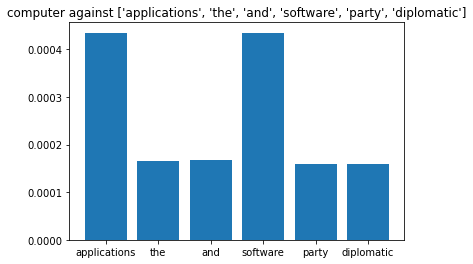

In [194]:
plt.title(f"{word} against {words}")
plt.bar(words, word_word_co.loc[word][words])
plt.show()

### Topic and word corelation

In [195]:
kmeans_model = KMeans(n_clusters=len(label_classes), random_state=0)
kmeans_model.fit(word_word_co)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [196]:
dist = kmeans_model.transform(word_word_co)

In [197]:
t1 = dist[:, 0]
np.array(vocabulary)[t1.argsort()[::-1]][:20]

array(['momentum', 'especially', 'along', 'range', 'ever', 'build',
       'half', 'power', 'building', 'space', 'legal', 'held', 'dr',
       'enormous', 'robert', 'moon', 'division', 'nearly', 'globe',
       'coalition'], dtype='<U73')

In [198]:
t2 = dist[:, 1]
np.array(vocabulary)[t2.argsort()[::-1]][:20]

array(['own', 'don', 'phone', 'system', 'am', 'william', 'book', 'note',
       'modern', 'source', 'number', 'service', '12', 'every', '11',
       '1993', 'national', 'german', 'beta', 'introduction'], dtype='<U73')

In [19]:
topic_word_distr = pd.DataFrame(data=0.0, columns=label_classes, index=vocabulary)

for topic, label in enumerate(label_classes):
    word_topic_frequency = word_doc_binary_freqency[document_word_frequency['__labels__'] == topic].sum(0)
    trust_factor = sigmoid(word_doc_frequency)
    
    topic_word_distr[label] = ((word_topic_frequency * trust_factor) / word_doc_frequency).fillna(0)
    
print(f"topic_word_distr has shape {topic_word_distr.shape}")

topic_word_distr has shape (4973, 2)


In [20]:
topic_word_distr.head()

,sci/comp,other
00,0.0,0.500032
000,0.0,0.500502
0188,0.0,0.500134
02026,0.0,0.500134
0837,0.0,0.500134


In [21]:
word = "companies"
topic_word_distr.loc[word].sort_values(ascending=False)

other       0.500883
sci/comp    0.000000
Name: companies, dtype: float64

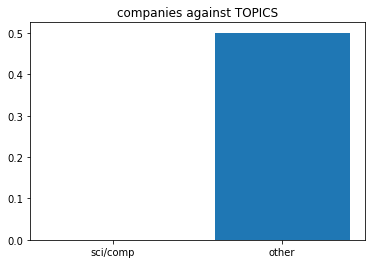

In [22]:
plt.title(f"{word} against TOPICS")
plt.bar(topic_word_distr.loc[word].index, topic_word_distr.loc[word])
plt.show()

### Evaluating Topic Model

In [23]:
score = 0
misclassified_train = []
print("Evaluating Topic Model...")
for doc_index in tqdm(range(len(train_labels))):
    doc_vector = train_doc_vectors[doc_index]
    
    doc_topic_word_distr, doc_topic = infer_topic(doc_vector, topic_word_distr, 0)
    score += int(doc_topic == label_classes[train_labels[doc_index]])
    
    if doc_topic != label_classes[train_labels[doc_index]]:
        misclassified_train.append(doc_index)

train_accuracy = score / (doc_index + 1)
print(f"==> train-accuracy is {train_accuracy*100:.2f}%\n")

Evaluating Topic Model...



==> train-accuracy is 100.00%



In [210]:
index = 0
label = label_classes[train_labels[misclassified_train[index]]]
doc_vector = train_doc_vectors[misclassified_train[index]]
doc_topic_word_distr, doc_topic = infer_topic(doc_vector, topic_word_distr, 0)

print(f"predicted = {doc_topic}, actual = {label}")
print("="*50)
print(clean_docs[misclassified_train[index]])
doc_topic_word_distr.loc[doc_topic_word_distr.sum(1).sort_values(ascending=False).index]
# doc_topic_word_distr.sum(1).sort_values(ascending=False)

IndexError: list index out of range

### Testing Topic Model

In [211]:
score = 0
misclassified_test = []
print("Evaluating Topic Model...")
for doc_index in tqdm(range(len(test_labels))):
    doc_vector = test_doc_vectors[doc_index]
    
    doc_topic_word_distr, doc_topic = infer_topic(doc_vector, topic_word_distr, 0)
    score += int(doc_topic == label_classes[test_labels[doc_index]])
    
    if doc_topic != label_classes[test_labels[doc_index]]:
        misclassified_test.append(doc_index)

test_accuracy = score / (doc_index + 1)
print(f"==> test-accuracy is {test_accuracy*100:.2f}%\n")

Evaluating Topic Model...



==> test-accuracy is 100.00%

